# ⛓️ LangChain
## 🎯 Overview

LangChain is an open-source framework designed to help developers build applications powered by large language models (LLMs). It's particularly valuable for applications requiring:

- **Reasoning**: Chains of thought or multi-step planning
- **Tool use**: Integration with search engines, code execution, APIs, and databases
- **Memory**: Maintaining context in conversations or multi-step workflows
- **Agentic behavior**: Dynamic decision-making about next actions
- **Data integration**: Connecting with real-world data sources like PDFs, websites, and databases

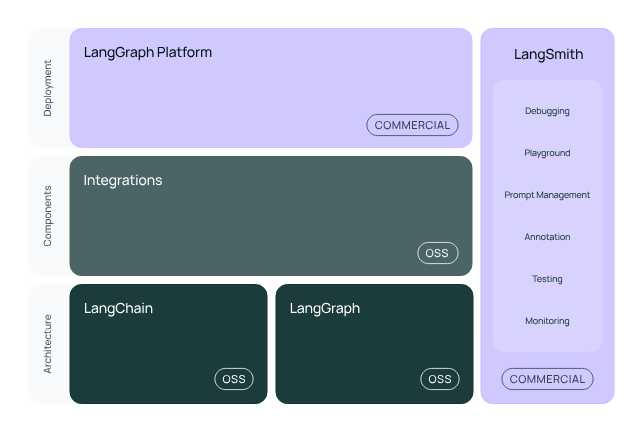

## 🔄 Application Lifecycle

LangChain simplifies the entire LLM application lifecycle:

1. **Development**: Build applications using LangChain's open-source components and integrations
   - **LangGraph**: Create stateful agents with streaming and human-in-the-loop capabilities

2. **Productionization**: Optimize applications with LangSmith
   - Inspect, monitor, and evaluate performance
   - Continuously refine for deployment

3. **Deployment**: Convert LangGraph applications to production-ready systems
   - API endpoints
   - Assistants via LangGraph Platform

The framework provides standardized interfaces for LLMs, embedding models, and vector stores, with hundreds of provider integrations to simplify development.

## 🉐 LangChain vs. LangGraph

### LangChain
- **Foundation Framework**: The core framework for building LLM applications
- **Component Library**: Provides fundamental building blocks (chains, agents, tools, memory)
- **Integration Hub**: Connects with hundreds of LLMs, databases, vector stores, etc.
- **Linear Workflows**: Primarily designed for sequential processing patterns
- **Broad Capabilities**: General-purpose toolkit for various LLM applications

### LangGraph
- **Extension of LangChain**: Built on top of LangChain's foundation
- **Graph-Based Workflows**: Specializes in complex, non-linear execution paths
- **State Management**: Enhanced support for maintaining agent state across steps
- **Advanced Agent Design**: Optimized for sophisticated agent architectures
- **Cyclic Processing**: Supports loops, recursion, and branching decision paths
- **Human Interaction**: Better tools for human-in-the-loop integration
- **Streaming Support**: Improved handling of incremental outputs

LangGraph essentially extends LangChain to handle more complex agent workflows that require sophisticated state management and non-linear execution patterns.

## 🔨 Core Concepts

| **Concept**               | **Description**                                                                 |
|---------------------------|---------------------------------------------------------------------------------|
| **Chains**                | Sequences of LLM calls and functions (e.g., ask LLM → call API → summarize).   |
| **Agents**                | LLMs that decide what actions to take (e.g., tools to use) dynamically.         |
| **Tools**                 | External resources (search engines, code execution, databases).                 |
| **Memory**                | Keeps context over a conversation or across sessions.                          |
| **Retrievers**            | Fetch relevant data chunks (e.g., from documents or embeddings).                |
| **Document Loaders**      | Load PDFs, websites, CSVs, etc., to prepare for retrieval.                      |
| **Embeddings & Vector Stores** | For semantic search (e.g., FAISS, Chroma, Weaviate).                     |


## 🛠️ Ecosystem & Integrations

LangChain integrates with:
- LLMs: OpenAI, Anthropic, HuggingFace, Mistral (via open source), Ollama, etc.
- Databases: SQL, MongoDB, Elasticsearch
- Vector stores: FAISS, Chroma, Pinecone, Weaviate
- Web scraping and file parsing: BeautifulSoup, PyPDF, Unstructured.io
- Cloud platforms: AWS, Azure, GCP

## ⌨️ Demo: A summarising prompt

- `dotenv`: for loading environment variables 
- `langchain.prompts.PrompTemplate` : PromptTemplate class for different langugae model prompts. A prompt template consists of a string template. It accepts a set of parameters from the user that can be used to generate a prompt for a language model.
- `ChatOpenAI` : openAI chat model 
- `StrOutputParser` : a string output parser for different language models

In [1]:
from dotenv import load_dotenv
from langchain.prompts import PromptTemplate
from langchain_openai import ChatOpenAI
from langchain_core.output_parsers import StrOutputParser
from langchain_ollama import ChatOllama


In [2]:
load_dotenv()
llm_openAI = ChatOpenAI(temperature=0, model="gpt-3.5-turbo")
llm_llama3 = ChatOllama(temperature=0,model="llama3")
llm_mistral = ChatOllama(temperature=0, model="mistral")
llm_gemma = ChatOllama(temperature=0, model="gemma")



In [ ]:
scientist = f"""Albert Einstein""" 
scientist_template = f""" You are a scientist, who is who agent?. given the name of a {scientist}, I want you to create 
1. A summary of the person and his contribution to science
2. A  rare joke about the person
3. His most path breaking work
"""
scientist_prompt = PromptTemplate(input_variables=["scientist"], template=scientist_template)
llm = ChatOpenAI(temperature=0, model="gpt-3.5-turbo")
chain = scientist_prompt | llm | StrOutputParser()
response = chain.invoke(input={"scientist":scientist})
print(response)

### 📖 Using OpenSource 

In [ ]:
chain_2 = scientist_prompt | llm_llama | StrOutputParser()
response2 = chain_2.invoke(input={"scientist":scientist})
print(response2)

chain_3 = scientist_prompt | llm_mistral | StrOutputParser()
response3 = chain_3.invoke(input={"scientist":scientist})
print(response3)

# Linkedin Data Processing

In [3]:
import requests 

In [4]:
def scrape_linkedin_profile(linkedin_profile_url: str,mock: bool = True):
    if mock:
        response = requests.get(linkedin_profile_url, timeout=10)
        if response.status_code == 200:
            data = response.json()
            linkedin_data = data.get("person")
        else:
            print(f"Request failed with status code{response.status_code}")
    else:
        print(f"No paid service API for linkedin scapping")
    
    return linkedin_data 

In [ ]:
url = "https://gist.githubusercontent.com/nv-mldev/70816c80a61eb7cc4bde51e5657505cf/raw/7da3b8ee12f1bc1720a9765cbd3c2d502e46b764/nithin.json"
linkedin_information = scrape_linkedin_profile(url)
person_prompt = """ You are a person summarizing agent working on Linkedin data. Here is the linkedin information {linkedin_information}
Generate : 
1. A short summary of the person
2. Two important career roles of the person
"""
person_prompt_template = PromptTemplate(input_variables=["linkedin_information"], template=person_prompt)
parser = StrOutputParser()
chain_4 = person_prompt_template | llm_llama3 | parser
response = chain_4.invoke(input= {"linkedin_information":linkedin_information})
print(response) 
    

Based on the provided LinkedIn data, here are the requested summaries:

**Short Summary:**
The person is a highly experienced computer vision and machine learning professional with a strong background in research and development. They have worked in various industries, including automotive (Tata Elxsi), medical imaging (QuEST Global), and software development (CastaliaLabs). With a Master's degree in Machine/Computer Vision from the University of Kerala, they possess a solid foundation in computer vision algorithms, image processing, and signal processing.

**Two Important Career Roles:**

1. **CEO & Founder at CastaliaLabs**: As the CEO and founder of CastaliaLabs, the person has demonstrated their entrepreneurial spirit and leadership skills. They have likely played a key role in shaping the company's vision, strategy, and direction.
2. **Senior Engineer: ADAS at Tata Elxsi (Jaguar and Land Rover ODC)**: In this role, the person worked on research and development of computer vision a

In [10]:
chain_5 = person_prompt_template | llm_mistral | parser
response_5 = chain_5.invoke({"linkedin_information":linkedin_information})
print(response_5)

1. The individual is a highly skilled professional with a Master's degree in Machine/Computer Vision from the University of Kerala. They have extensive experience in Computer Vision, Image Processing, Algorithms, Signal Processing, and Machine Learning. Their proficiency lies in languages such as Python, MATLAB, and they are adept at using tools like OpenCV. Throughout their career, they have worked on various projects involving digital signal processors, software development, and software engineering.

  2. Two important career roles of this individual include:
     - Computer Vision Research Engineer at QuEST Global: Here, they developed image processing algorithms for denoising medical images, 3D surface reconstruction, and a multi-view stereo pipeline for 3D scanners.
     - Senior Engineer at Tata Elxsi: In this role, they worked on the development of Driver Assistance Systems for Jaguar and Land Rover, contributing to modules such as Lane Departure Warning, Pedestrian Detection, 